# Tutorial: distortion function

The distortion can be assigned to the optics of the telescope. The distortion function should receive an array with a shape of $(2, N)$. The first and second elements are the x- and y-positions on the focal plane, respectively. An array with the same shape is returned, which contains the coordinates with distortion.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import warpfield as w

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle
from astropy.time import Time
import astropy.units as u

An artificial source set is used in this notebook. Define a grid in a &pm;0.3&deg; region around the origin of the ICRS frame.

In [3]:
arr = np.linspace(-0.3, 0.3, 30)
xx,yy = np.meshgrid(arr,arr)
ra  = [x*u.degree for x in xx.flat]
dec = [y*u.degree for y in yy.flat] 
src = SkyCoord(ra, dec, frame='icrs')

The telescope is pointed toward the origin of the ICRS frame. The position angle is 0.0&deg;.

In [4]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='icrs')
position_angle = Angle(0.0, unit='degree')
jasmine = w.Telescope(pointing, position_angle)

The figure below shows the on-sky distribution of the artifical sources. A well-organized grid pattern is recognized.

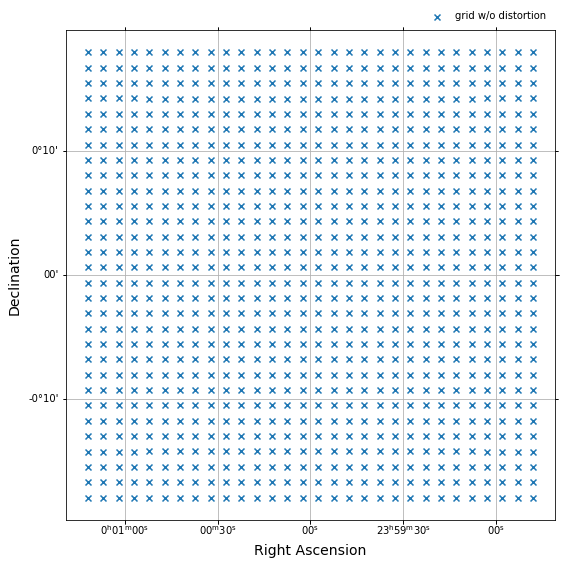

In [5]:
w.display_sources(pointing, src, title='grid w/o distortion')

The `identity_transformation` is assigned to the optics if not specified.

In [6]:
jasmine.optics.distortion

<function warpfield.telescope.identity_transformation(position)>

This function does not change the given position at all. Thus, the source distribution on the plane is the same as on the sky.

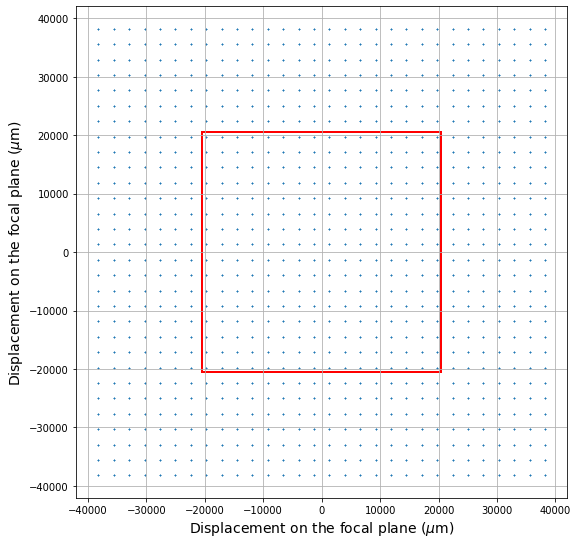

In [7]:
jasmine.display_focal_plane(src)

As long as the input and output formats are valid, any function can be assigned to the distortion function of the optics. The module provides the `distortion_generator` function to genrate a common distortion function.



The `distortion_generator` receives three parameters. The first argument $K$ is the radial component. The second and third arguments, $S$ and $T$, define the tangential component.

The distortion function is defined as follows:

$$
\begin{cases}
r = \sqrt{x^2 + y^2}, ~~ r_6 = r/10^6, \\
x' = x \left(1 + \sum_n{K_n {r_6}^{2n}} \right)
   + \left(S_1\left(r^2 + 2x^2\right) + 2S_2xy \right) 
     \left(1 + \sum_n{T_n {r_6}^{2n}} \right)\\
y' = y \left(1 + \sum_n{K_n {r_6}^{2n}} \right)
   + \left(2S_1xy + S_2\left(r^2 + 2y^2\right) \right) 
     \left(1 + \sum_n{T_n {r_6}^{2n}} \right)\\
\end{cases}
$$

The $K$ and $T$ can be given as vectors. The $S$ should be an array with two elements.

Here is an example of a radial distortion function. A barrel-type distortion pattern can be recognized. Different distortion patterns are obtained with different parameters.

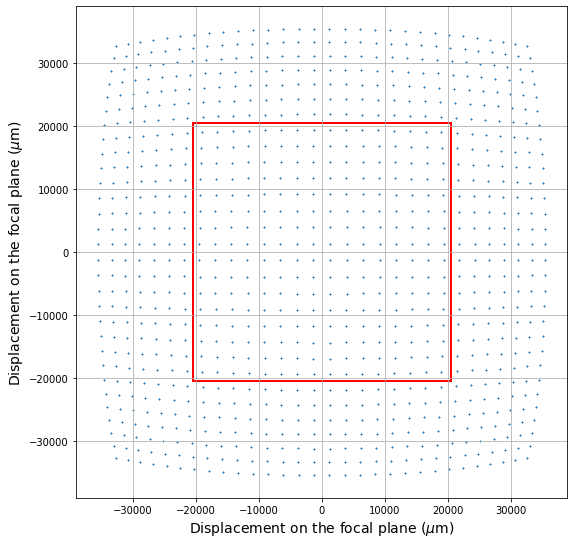

In [19]:
distortion = w.distortion_generator(K=-5e1)
jasmine.set_distortion(distortion)
jasmine.display_focal_plane(src)

The $S$ parameter is specified in the followng example. The distortion pattern is completely different from the previous one.

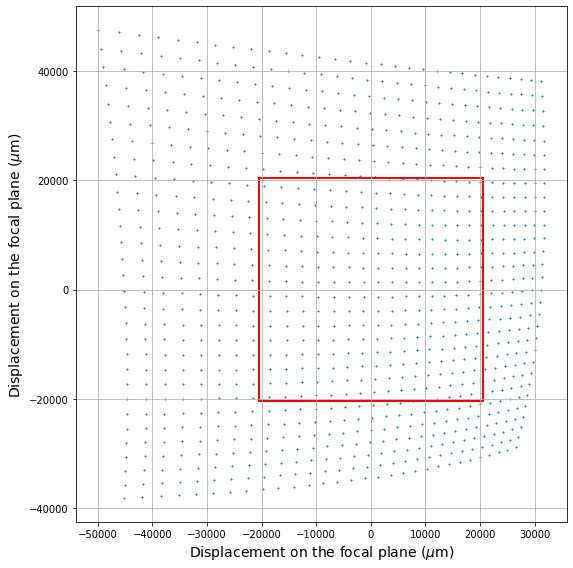

In [21]:
distortion = w.distortion_generator(S=[-8,4])
jasmine.set_distortion(distortion)
jasmine.display_focal_plane(src)